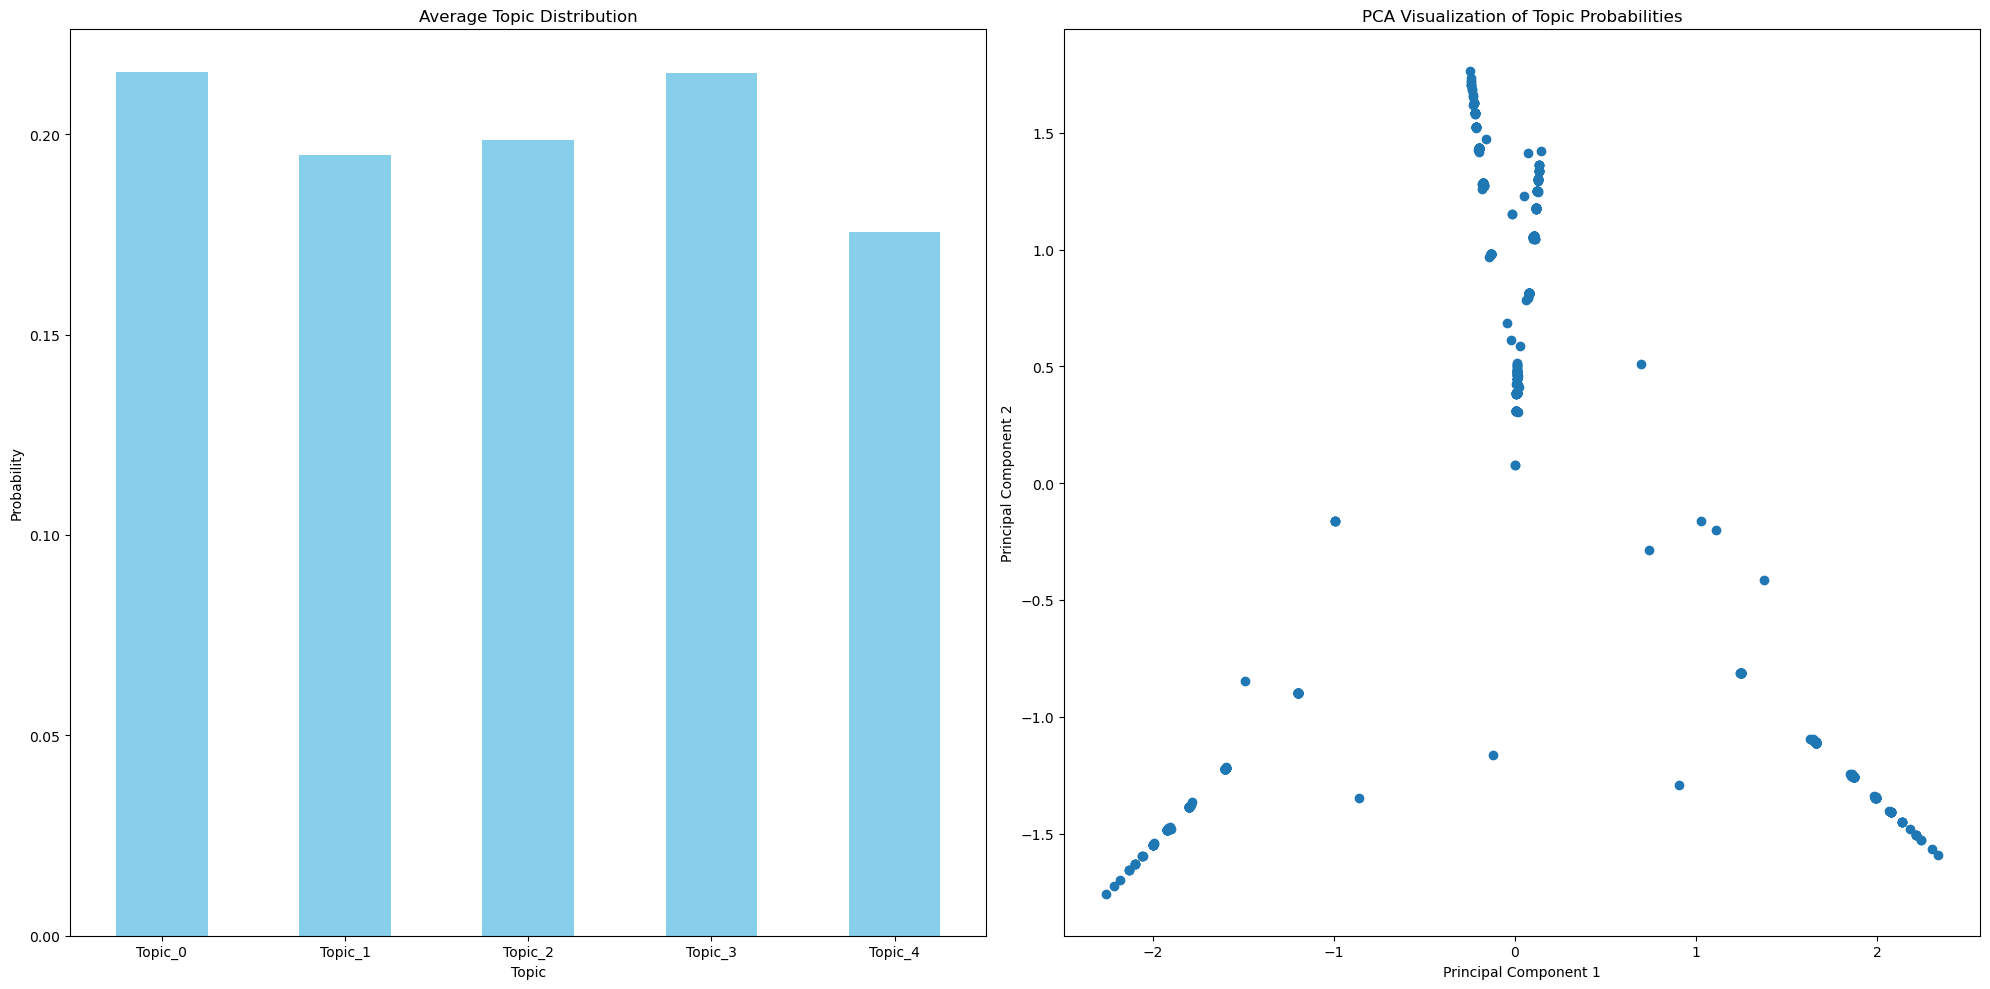

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load CSV data
data = pd.read_csv("C:\\Users\\jesse\\Desktop\\Master Thesis\\Experiment\\topic_labeled_data.csv")

# Drop rows with NaN values in the "Topic" column
data.dropna(subset=['Topic'], inplace=True)

# Extract topic distributions
topic_distributions = data["Topic"]

# Convert topic distributions to a list of dictionaries
topic_dicts = [eval(topic_dist) for topic_dist in topic_distributions]

# Create an empty DataFrame to store topic probabilities
topic_probs_df = pd.DataFrame(columns=[f"Topic_{i}" for i in range(5)])

# Fill the DataFrame with topic probabilities
for topic_dist in topic_dicts:
    topic_probs = {f"Topic_{topic[0]}": topic[1] for topic in topic_dist}
    topic_probs_df = pd.concat([topic_probs_df, pd.DataFrame(topic_probs, index=[0])], ignore_index=True)

# Drop rows with NaN values in the DataFrame
topic_probs_df.dropna(inplace=True)

# Plotting
plt.figure(figsize=(20, 10))

# Subplot 1: Bar plot of average topic distribution
plt.subplot(1, 2, 1)
topic_probs_df.mean().plot(kind='bar', color='skyblue')
plt.title('Average Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.xticks(rotation=0)

# Subplot 2: Scatter plot of PCA visualization
# Standardize the data
scaler = StandardScaler()
topic_probs_std = scaler.fit_transform(topic_probs_df)

# Perform PCA
pca = PCA(n_components=2)
topic_probs_pca = pca.fit_transform(topic_probs_std)

# Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(topic_probs_pca[:, 0], topic_probs_pca[:, 1])
plt.title('PCA Visualization of Topic Probabilities')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
